# Topic Modelling 
adapted v1 with https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/


The following are key factors to obtaining good segregation topics:



*   The quality of text processing.
*   The variety of topics the text talks about.
* The choice of topic modeling algorithm.
* The number of topics fed to the algorithm.
* The algorithms tuning parameters.

---



Improvements: 
* extend stop word removal

### Load Packages

In [1]:
pip install pyldavis

In [2]:
import pandas as pd
import re
from pprint import pprint 
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import gensim.corpora as corpora
from gensim.models import CoherenceModel

from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer('english')

import nltk
nltk.download('wordnet')
from nltk.stem.porter import *

import numpy as np
np.random.seed(2018)
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packa

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/MyDrive/bbc_test_novideos_v2.csv',encoding = 'latin1')
df.head

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<bound method NDFrame.head of                                                  link  ...                                               text
0          https://www.bbc.co.uk/news/health-47749964  ...  Psychiatrists are being urged to ask children ...
1              https://www.bbc.co.uk/news/uk-47751285  ...  The number of adults seeking help to cope with...
2          https://www.bbc.co.uk/news/health-47735103  ...  The current system of checking newborns for hi...
3          https://www.bbc.co.uk/news/health-47735108  ...  Calorie-filled Easter eggs are being sold in s...
4          https://www.bbc.co.uk/news/health-47749025  ...  "She is so desperate to end it all, she curren...
..                                                ...  ...                                                ...
95         https://www.bbc.co.uk/news/health-48256759  ...  Glucosamine supplements, better known as a rem...
96  https://www.bbc.co.uk/news/world-us-canada-482...  ...  Alabama has become the latest 

In [4]:
med = list(df.loc[:, "text"].values)

### Preprocess Data

In [5]:
import string

In [6]:
# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

#remove html tags, emails, urls, ~~numbers~~, new line char, single quotes
def preprocess(text):
    result = []
    text = re.sub('<[^>]*>', '', text)
    text = re.sub('\S*@\S*\s?', '', text)
    #text = re.sub('https?://[A-Za-z0-9]','',text)
    text = re.sub('[^a-zA-Z]',' ',text)
    text = re.sub('\s+', ' ', text)
    text = re.sub("\'", "", text)
    text = text.strip(string.punctuation)

    # stop words and words less than 3 chars 
    for token in gensim.utils.simple_preprocess(text):
        # if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
        # if len(token) > 3:
      result.append(token)
    return result

<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<input>:8: DeprecationWarning: invalid escape sequence \S
<input>:11: DeprecationWarning: invalid escape sequence \s
<ipytho

In [7]:
doc_sample = med[0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
pprint(words)

print('\n\n tokenized document: ')
pprint(preprocess(doc_sample))

original document: 
['Psychiatrists',
 'are',
 'being',
 'urged',
 'to',
 'ask',
 'children',
 'with',
 'mental',
 'health',
 'issues',
 'how',
 'long',
 'they',
 'spend',
 'online',
 'and',
 'what',
 'they',
 'use',
 'social',
 'media',
 'for.\nQuestions',
 'about',
 'technology',
 'should',
 'be',
 'a',
 'routine',
 'part',
 'of',
 'assessments,',
 'the',
 'Royal',
 'College',
 'of',
 'Psychiatrists',
 'says.',
 '\nIt',
 'is',
 'concerned',
 'about',
 'how',
 'time',
 'spent',
 'online',
 'impacts',
 'on',
 'mood,',
 'sleep,',
 'diet',
 'and',
 'behaviour.\nThe',
 'government',
 'is',
 'expected',
 'to',
 'announce',
 'plans',
 'to',
 'regulate',
 'social',
 'media',
 'companies',
 'soon.\nThe',
 "College's",
 'advice',
 'comes',
 'as',
 'evidence',
 'grows',
 'of',
 'a',
 'possible',
 'link',
 'between',
 'harmful',
 'content',
 'or',
 'time',
 'spent',
 'online,',
 'and',
 'poor',
 'mental',
 'health.\nIt',
 'is',
 'planning',
 'to',
 'publish',
 'a',
 'report',
 'later',
 'this',


In [8]:
all_cleaned_texts = np.array([preprocess(m) for m in med])
print(all_cleaned_texts.shape)
print(all_cleaned_texts[0:5])

(100,)
[list(['psychiatrists', 'are', 'being', 'urged', 'to', 'ask', 'children', 'with', 'mental', 'health', 'issues', 'how', 'long', 'they', 'spend', 'online', 'and', 'what', 'they', 'use', 'social', 'media', 'for', 'questions', 'about', 'technology', 'should', 'be', 'routine', 'part', 'of', 'assessments', 'the', 'royal', 'college', 'of', 'psychiatrists', 'says', 'it', 'is', 'concerned', 'about', 'how', 'time', 'spent', 'online', 'impacts', 'on', 'mood', 'sleep', 'diet', 'and', 'behaviour', 'the', 'government', 'is', 'expected', 'to', 'announce', 'plans', 'to', 'regulate', 'social', 'media', 'companies', 'soon', 'the', 'college', 'advice', 'comes', 'as', 'evidence', 'grows', 'of', 'possible', 'link', 'between', 'harmful', 'content', 'or', 'time', 'spent', 'online', 'and', 'poor', 'mental', 'health', 'it', 'is', 'planning', 'to', 'publish', 'report', 'later', 'this', 'year', 'about', 'its', 'stance', 'on', 'technology', 'use', 'and', 'children', 'mental', 'health', 'which', 'will', 'in

## Bigram & Trigram

In [9]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(all_cleaned_texts, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[all_cleaned_texts], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[all_cleaned_texts[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['psychiatrists', 'are', 'being', 'urged', 'to', 'ask', 'children', 'with', 'mental_health', 'issues', 'how', 'long', 'they', 'spend', 'online', 'and', 'what', 'they', 'use', 'social_media', 'for', 'questions', 'about', 'technology', 'should', 'be', 'routine', 'part', 'of', 'assessments', 'the', 'royal_college', 'of', 'psychiatrists', 'says', 'it', 'is', 'concerned', 'about', 'how', 'time', 'spent', 'online', 'impacts', 'on', 'mood', 'sleep', 'diet', 'and', 'behaviour', 'the', 'government', 'is', 'expected', 'to', 'announce', 'plans', 'to', 'regulate', 'social_media_companies', 'soon', 'the', 'college', 'advice', 'comes', 'as', 'evidence', 'grows', 'of', 'possible', 'link', 'between', 'harmful', 'content', 'or', 'time', 'spent', 'online', 'and', 'poor', 'mental_health', 'it', 'is', 'planning', 'to', 'publish', 'report', 'later', 'this', 'year', 'about', 'its', 'stance', 'on', 'technology', 'use', 'and', 'children', 'mental_health', 'which', 'will', 'include', 'recommendations', 'for', 

In [10]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in gensim.parsing.preprocessing.STOPWORDS] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts):
    lemmatizer = WordNetLemmatizer()
    return [[lemmatizer.lemmatize(element) for element in text] for text in texts]

In [11]:
# Remove Stop Words
data_words_nostops = remove_stopwords(all_cleaned_texts)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[:100])

[['psychiatrist', 'urged', 'ask', 'child', 'mental_health', 'issue', 'long', 'spend', 'online', 'use', 'social_media', 'question', 'technology', 'routine', 'assessment', 'royal_college', 'psychiatrist', 'say', 'concerned', 'time', 'spent', 'online', 'impact', 'mood', 'sleep', 'diet', 'behaviour', 'government', 'expected', 'announce', 'plan', 'regulate', 'social_media', 'company', 'soon', 'college', 'advice', 'come', 'evidence', 'grows', 'possible', 'link', 'harmful', 'content', 'time', 'spent', 'online', 'poor', 'mental_health', 'planning', 'publish', 'report', 'later', 'year', 'stance', 'technology', 'use', 'child', 'mental_health', 'include', 'recommendation', 'parent', 'child', 'doctor', 'assessing', 'child', 'psychiatrist', 'advised', 'think', 'royal_college', 'psychiatrist', 'recommends', 'child', 'stop', 'technology', 'hour', 'going', 'bed', 'avoid', 'technology', 'mealtime', 'view', 'echoed', 'chief', 'medical', 'officer', 'recent', 'guidance', 'social_media', 'group', 'mp', 're

### Dictionary and Corpus

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 8), (29, 1), (30, 1), (31, 2), (32, 1), (33, 2), (34, 3), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 4), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 2), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 3), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 3), (82, 4), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 2), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 1), (102, 4), (103, 3), (104, 1), (105, 1), (106, 1), (107, 1), (108, 1), (109, 1), (110, 2)

In [13]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('access', 1),
  ('act', 1),
  ('activity', 1),
  ('added', 1),
  ('adding', 1),
  ('addressed', 1),
  ('adolescent', 1),
  ('advice', 1),
  ('advised', 1),
  ('affecting', 1),
  ('announce', 2),
  ('anxiety', 1),
  ('ask', 1),
  ('assessing', 2),
  ('assessment', 1),
  ('audience', 1),
  ('avoid', 1),
  ('bed', 1),
  ('behaviour', 2),
  ('bernadka', 1),
  ('big', 1),
  ('bigger', 1),
  ('called', 1),
  ('care', 1),
  ('cause', 2),
  ('chair', 1),
  ('chief', 1),
  ('chief_executive', 1),
  ('child', 8),
  ('claire', 1),
  ('clicking', 1),
  ('clinician', 2),
  ('college', 1),
  ('come', 2),
  ('company', 3),
  ('compare', 1),
  ('concern', 1),
  ('concerned', 1),
  ('condition', 1),
  ('consider', 1),
  ('considered', 1),
  ('content', 4),
  ('copying', 1),
  ('daughter', 1),
  ('deliberately', 1),
  ('diet', 1),
  ('director', 1),
  ('discussing', 1),
  ('displaying', 1),
  ('distress', 1),
  ('doctor', 1),
  ('dr', 2),
  ('driver', 1),
  ('dubicka', 2),
  ('duty', 1),
  ('earlier'

## LDA with Bigram

In [14]:
#train model 
lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=id2word, passes=2, workers=2)

# For each topic, we will explore the words occuring in that topic and its relative weight
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

Topic: 0 
Words: 0.012*"said" + 0.010*"say" + 0.009*"people" + 0.007*"child" + 0.007*"patient" + 0.006*"year" + 0.005*"doctor" + 0.004*"disease" + 0.004*"treatment" + 0.004*"medical"
Topic: 1 
Words: 0.013*"people" + 0.012*"said" + 0.008*"health" + 0.007*"year" + 0.006*"case" + 0.005*"child" + 0.005*"measles" + 0.005*"life" + 0.005*"vaccine" + 0.005*"country"
Topic: 2 
Words: 0.012*"said" + 0.011*"people" + 0.007*"study" + 0.007*"say" + 0.007*"risk" + 0.006*"year" + 0.006*"woman" + 0.006*"drug" + 0.005*"uk" + 0.005*"treatment"
Topic: 3 
Words: 0.010*"said" + 0.009*"meat" + 0.008*"woman" + 0.007*"say" + 0.005*"year" + 0.005*"child" + 0.004*"new" + 0.004*"abortion" + 0.004*"snakebite" + 0.004*"life"
Topic: 4 
Words: 0.010*"drug" + 0.007*"said" + 0.004*"researcher" + 0.004*"study" + 0.004*"patient" + 0.003*"say" + 0.003*"like" + 0.003*"work" + 0.003*"woman" + 0.003*"university"
Topic: 5 
Words: 0.015*"said" + 0.010*"cancer" + 0.010*"brain" + 0.006*"people" + 0.006*"drug" + 0.006*"woman" +

In [15]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"said" + 0.010*"say" + 0.009*"people" + 0.007*"child" + '
  '0.007*"patient" + 0.006*"year" + 0.005*"doctor" + 0.004*"disease" + '
  '0.004*"treatment" + 0.004*"medical"'),
 (1,
  '0.013*"people" + 0.012*"said" + 0.008*"health" + 0.007*"year" + '
  '0.006*"case" + 0.005*"child" + 0.005*"measles" + 0.005*"life" + '
  '0.005*"vaccine" + 0.005*"country"'),
 (2,
  '0.012*"said" + 0.011*"people" + 0.007*"study" + 0.007*"say" + 0.007*"risk" '
  '+ 0.006*"year" + 0.006*"woman" + 0.006*"drug" + 0.005*"uk" + '
  '0.005*"treatment"'),
 (3,
  '0.010*"said" + 0.009*"meat" + 0.008*"woman" + 0.007*"say" + 0.005*"year" + '
  '0.005*"child" + 0.004*"new" + 0.004*"abortion" + 0.004*"snakebite" + '
  '0.004*"life"'),
 (4,
  '0.010*"drug" + 0.007*"said" + 0.004*"researcher" + 0.004*"study" + '
  '0.004*"patient" + 0.003*"say" + 0.003*"like" + 0.003*"work" + 0.003*"woman" '
  '+ 0.003*"university"'),
 (5,
  '0.015*"said" + 0.010*"cancer" + 0.010*"brain" + 0.006*"people" + '
  '0.006*"drug" +

## Compute Model Perplexity and Coherence Score

In [16]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for


Perplexity:  -8.42176515896163

Coherence Score:  0.3056516445154669


In [17]:
import pyLDAvis.gensim_models

In [18]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.068192  0.008619       1        1  20.019500
5      0.051113 -0.013977       2        1  18.549124
0      0.006338  0.021576       3        1  16.011198
2      0.052033  0.011558       4        1  15.503703
3     -0.061634 -0.090323       5        1   7.297599
6     -0.070912  0.073512       6        1   6.513649
8     -0.019212  0.015099       7        1   6.225493
4      0.014504 -0.025284       8        1   4.553882
7      0.000974 -0.008052       9        1   4.355297
9     -0.041396  0.007272      10        1   0.970555, topic_info=          Term        Freq       Total Category  logprob  loglift
28       child  170.000000  170.000000  Default  30.0000  30.0000
250       drug  118.000000  118.000000  Default  29.0000  29.0000
1302  dementia   45.000000   45.000000  Default  28.0000  28.0000
159        say  214.000000  214.000000  Default  27.0000  27.0000
2184      meat   38.000000   38.000000  Default  26.0000  26.0000
...        ...         ...         ...      ...      ...      ...
369       case    0.648465   97.901910  Topic10  -6.2266  -0.3821
1011        mr    0.618275   39.544308  Topic10  -6.2743   0.4768
126     people    0.649894  284.246948  Topic10  -6.2244  -1.4457
877        day    0.617528   62.266677  Topic10  -6.2755   0.0216
120         nh    0.618249   69.461234  Topic10  -6.2743  -0.0866

[729 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
6557      1  0.069593     abortion
6557      5  0.765521     abortion
6557      7  0.069593     abortion
1744      6  0.419872  accompanied
2901      1  0.243501         adhd
...     ...       ...          ...
200       5  0.026687        young
200       6  0.053375        young
200       7  0.053375        young
200       8  0.026687        young
200       9  0.106749        young

[1811 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 6, 1, 3, 4, 7, 9, 5, 8, 10])

# LDA Mallet Model 

In [19]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [20]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2021-07-08 17:05:09--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip.2’

mallet-2.0.8.zip.2  100%[===================>]  15.43M  7.76MB/s    in 2.0s    

2021-07-08 17:05:12 (7.76 MB/s) - ‘mallet-2.0.8.zip.2’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: 

In [21]:
from gensim.models.wrappers import LdaMallet
from gensim import similarities

In [22]:
# os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [23]:
pip install --upgrade smart-open==1.10.0

Requirement already up-to-date: smart-open==1.10.0 in /usr/local/lib/python3.7/dist-packages (1.10.0)


In [24]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [35]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Perplexity
# print('\nPerplexity: ',ldamallet.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
with np.errstate(invalid='ignore'):
    ldamallet_score = coherence_model_ldamallet.get_coherence()

# coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ',  ldamallet_score)

[(0,
  [('drug', 0.028246753246753246),
   ('doctor', 0.015909090909090907),
   ('state', 0.015584415584415584),
   ('medicine', 0.013311688311688311),
   ('yaba', 0.010714285714285714),
   ('year', 0.00974025974025974),
   ('cuban', 0.00974025974025974),
   ('told', 0.00909090909090909),
   ('mission', 0.008441558441558441),
   ('healthcare', 0.008441558441558441)]),
 (1,
  [('patient', 0.03805224121251209),
   ('treatment', 0.030957755562721703),
   ('medical', 0.02289584005159626),
   ('infection', 0.012254111576910674),
   ('body', 0.012254111576910674),
   ('dr', 0.010641728474685586),
   ('left', 0.010319251854240567),
   ('hair', 0.010319251854240567),
   ('hospital', 0.009351821992905514),
   ('month', 0.00838439213157046)]),
 (2,
  [('work', 0.019568151147098516),
   ('alex', 0.01417004048582996),
   ('surgeon', 0.011808367071524967),
   ('thing', 0.010796221322537112),
   ('life', 0.010796221322537112),
   ('story', 0.010458839406207827),
   ('circumcision', 0.010121457489878

## Find optimal number of topics

In [36]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [37]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


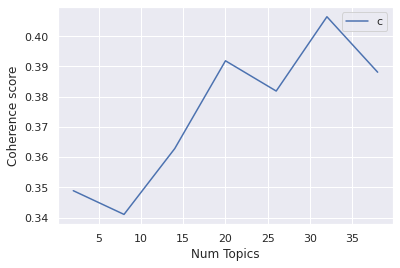

In [38]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [39]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3489
Num Topics = 8  has Coherence Value of 0.341
Num Topics = 14  has Coherence Value of 0.3628
Num Topics = 20  has Coherence Value of 0.3919
Num Topics = 26  has Coherence Value of 0.3819
Num Topics = 32  has Coherence Value of 0.4065
Num Topics = 38  has Coherence Value of 0.3881
